In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Netflix Dataset.csv")
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.shape

(7789, 11)

In [ ]:
print("\n Basic Info:")
print(df.info())

print("-" * 30)

print("\n Missing Values:")
print(df.isnull().sum())

print("-" * 30)

print("\n Unique Value Counts:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None
------------------------------

 Missing Values:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype

In [ ]:
df = df.dropna(subset=['Release_Date', 'Rating'])

In [ ]:
df['Director'] = df['Director'].fillna('Not Available')
df['Cast'] = df['Cast'].fillna('Not Available')
df['Country'] = df['Country'].fillna('Unknown')

In [ ]:
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
Year            0
Duration_Num    0
dtype: int64


In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

In [ ]:
df['Year'] = df['Release_Date'].dt.year

In [ ]:
df['Duration_Num'] = df['Duration'].str.extract(r'(\d+)').astype(float)

In [ ]:
print("\n✅ Data Cleaning Completed — Missing Release_Date & Rating Rows Removed!")
print(f"Remaining rows: {len(df)}")


✅ Data Cleaning Completed — Missing Release_Date & Rating Rows Removed!
Remaining rows: 7684


In [ ]:
df.shape

(7684, 13)

In [ ]:
print("\n Basic Info:")
print(df.info())


 Basic Info:
<class 'pandas.core.frame.DataFrame'>
Index: 7772 entries, 0 to 7788
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7772 non-null   object        
 1   Category      7772 non-null   object        
 2   Title         7772 non-null   object        
 3   Director      7772 non-null   object        
 4   Cast          7772 non-null   object        
 5   Country       7772 non-null   object        
 6   Release_Date  7684 non-null   datetime64[ns]
 7   Rating        7772 non-null   object        
 8   Duration      7772 non-null   object        
 9   Type          7772 non-null   object        
 10  Description   7772 non-null   object        
 11  Year          7684 non-null   float64       
 12  Duration_Num  7772 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 850.1+ KB
None


In [ ]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Duration_Num
0,s1,TV Show,3%,Not Available,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,4.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,93.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,78.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,80.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020.0,123.0


/tmp/ipython-input-530491868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='Set2')


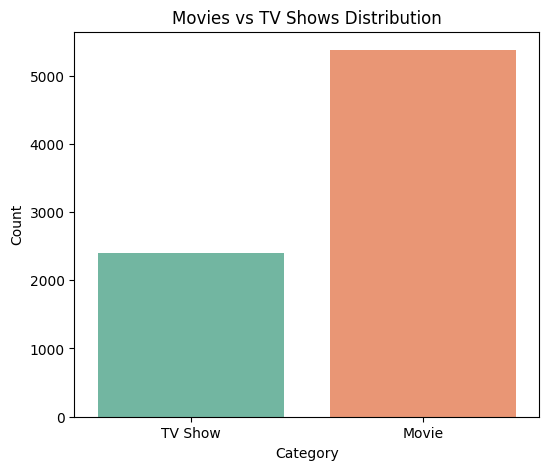

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Category', palette='Set2')
plt.title('Movies vs TV Shows Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

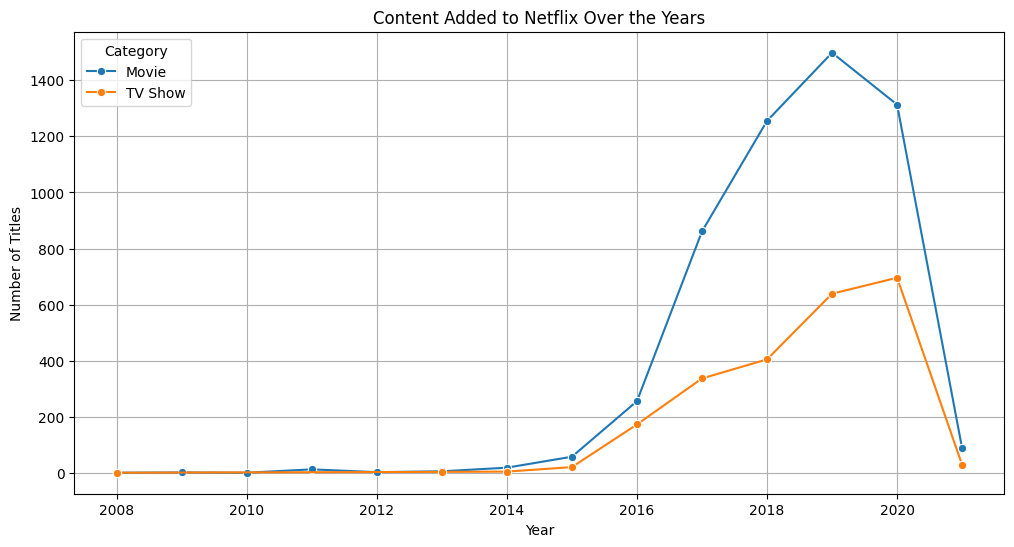

In [ ]:
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')
plt.figure(figsize=(12,6))
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

/tmp/ipython-input-568240383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')


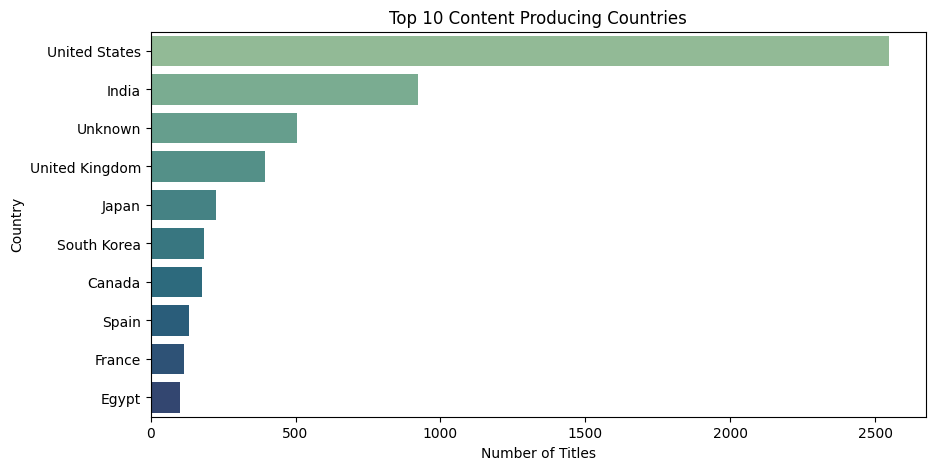

In [ ]:
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')
plt.title('Top 10 Content Producing Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

/tmp/ipython-input-4073287109.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


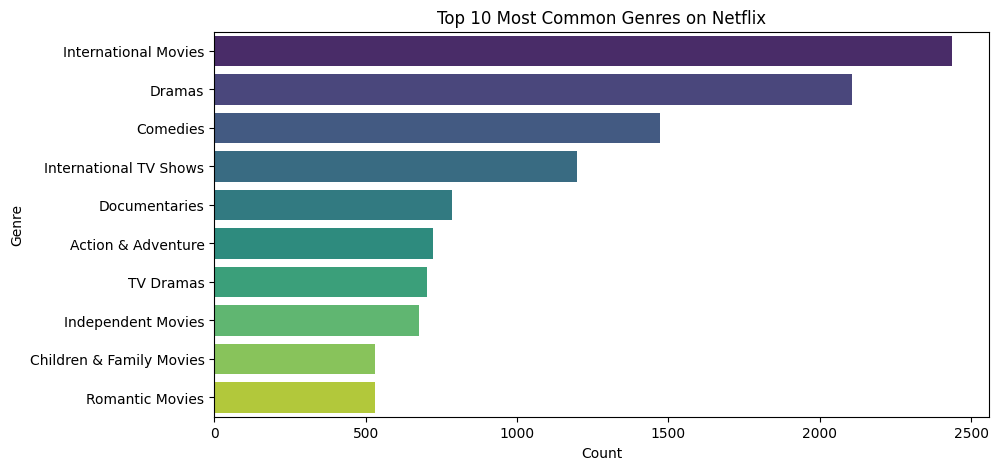

In [ ]:
all_genres = df['Type'].dropna().str.split(',').explode().str.strip()
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

/tmp/ipython-input-1864378772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, palette='magma')


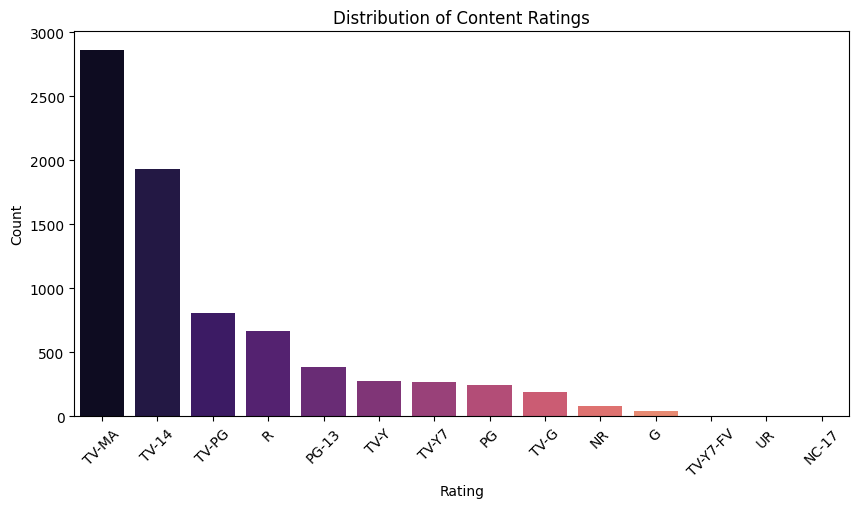

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, palette='magma')
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

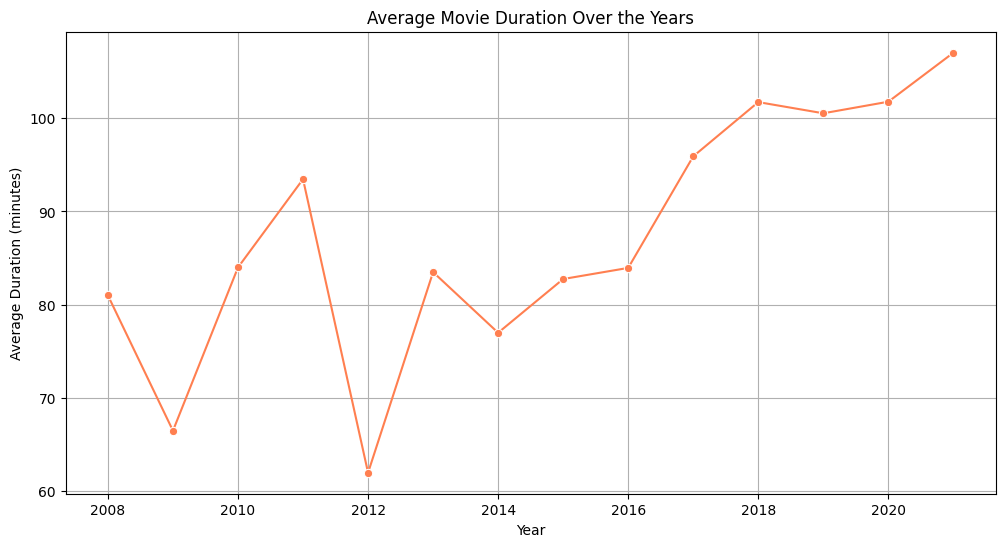


✅ EDA and Visualization Completed Successfully!


In [ ]:
movie_duration = df[df['Category'] == 'Movie'].groupby('Year')['Duration_Num'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=movie_duration, x='Year', y='Duration_Num', color='coral', marker='o')
plt.title('Average Movie Duration Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()

print("\n✅ EDA and Visualization Completed Successfully!")

In [ ]:
print("\n📈 Key Insights Summary:")
print("1. The number of Movies is higher than TV Shows, but TV content has increased recently.")
print("2. USA dominates Netflix’s catalog, followed by India and UK.")
print("3. Top genres include Dramas, Documentaries, and Comedies.")
print("4. Most content is rated TV-MA, indicating adult audiences.")
print("5. Average movie duration has slightly decreased over the years.")


📈 Key Insights Summary:
1. The number of Movies is higher than TV Shows, but TV content has increased recently.
2. USA dominates Netflix’s catalog, followed by India and UK.
3. Top genres include Dramas, Documentaries, and Comedies.
4. Most content is rated TV-MA, indicating adult audiences.
5. Average movie duration has slightly decreased over the years.
